In [1]:
# %matplotlib widget
import lightkurve as lk
# %matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
# %matplotlib inline
from Pyriod import Pyriod
%matplotlib widget

In [2]:
print(lk.__version__)

2.4.0


From here, working with TESS data 

In [3]:
# TIC = 'TIC 244203955' #omega eri
TIC = 'TIC 465088681' #lambda sco
# TIC = 'TIC 299096773' #mu eri, for reference
lk.search_lightcurve(TIC)

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,SPOC,120,465088681,0.0
1,TESS Sector 12,2019,TESS-SPOC,1800,465088681,0.0
2,TESS Sector 12,2019,QLP,1800,465088681,0.0
3,TESS Sector 39,2021,SPOC,120,465088681,0.0
4,TESS Sector 39,2021,TESS-SPOC,600,465088681,0.0
5,TESS Sector 39,2021,QLP,600,465088681,0.0
6,TESS Sector 66,2023,SPOC,120,465088681,0.0
7,TESS Sector 66,2023,QLP,200,465088681,0.0


In [4]:
search_data = lk.search_lightcurve(TIC)

In [5]:
lc_collection = search_data.download_all()
lc0norm = lc_collection[3].normalize().remove_outliers().bin(bins=520)
lc0 = lc_collection[3]

In [ ]:
pg = lc0.normalize(unit='ppm').to_periodogram()
pg

In [ ]:
pg.plot(scale='log')

In [ ]:
pg.show_properties()

In [ ]:
period = pg.period_at_max_power
period

In [ ]:
pg.plot(view='period')

In [ ]:
print(len(lc0norm))
print(lc0norm)
print(lc0norm[100:])

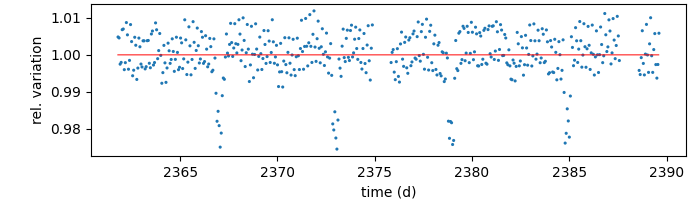

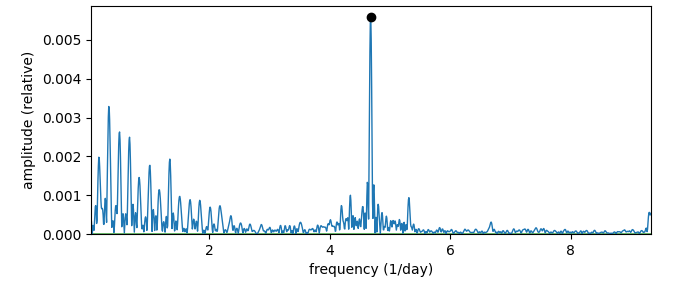

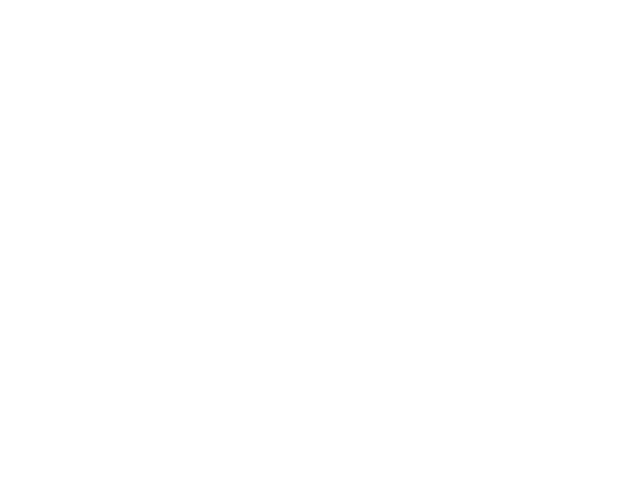

In [6]:
# pyriod_tess = Pyriod(lc0norm, freq_unit="1/d", amp_unit='relative')
Pyriod(lc0norm, freq_unit="1/d", amp_unit='relative').Pyriod()
# plt.savefig("sector12periodogram.png", bbox_inches = 'tight', dpi =600)

In [7]:
pyriod_tess.Periodogram()
plt.show()
# plt.savefig("sector12pyriod.png", bbox_inches = 'tight', dpi =600)

In [ ]:
Pyriod(lc0norm, freq_unit="1/d", amp_unit='relative').Pyriod()

In [ ]:
lombscargle = lc0norm.to_periodogram(method='lombscargle')#[0:2000]
lombscargle.plot()
# plt.title('TESS: normalized periodogram')
# lc0.normalize().to_periodogram(method='lombscargle')[0:1000].plot()
# plt.title('TESS: raw data')
plt.legend().set_visible(False)
plt.title("Sector 12")
plt.savefig("sector12periodogram.png", bbox_inches = 'tight', dpi =600)
plt.show()
# plt.savefig("lombscargle.png", bbox_inches = 'tight', dpi =600)

In [ ]:
lc_collection[3].plot(normalize=True)